# Importing Python Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Data Loading And Pre-processing

In [2]:
data = pd.read_csv("train.csv") 
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03-09-2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02-02-2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05-09-2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [3]:
data1 = pd.read_csv("test.csv") 
data1.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05-06-2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [4]:
print("Train :",data.shape)
print("Test:",data1.shape)

Train : (137, 43)
Test: (100000, 42)


###### Data Columns
+   #### Id * :  Restaurant id. *
+   #### Open Date *  : opening date for a restaurant * 
+   #### City : *  City that the restaurant is in. Note that there are unicode in the names.  * 
+   #### City Group:  * Type of the city. Big cities, or Other.  * 
+   #### Type: Type of the restaurant. FC: *  Food Court, IL: Inline, DT: Drive Thru * 
+   #### P1, P2 - P37: *  There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators. * 
+   #### Revenue: *  The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values.  * 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

##### There are no null values in the dataset, which is good. But, will have to incorporate proper format for Opendate column using to_datetime function. 

In [6]:
data['Open Date'] = pd.to_datetime(data['Open Date'])
data1['Open Date'] = pd.to_datetime(data1['Open Date'])

In [7]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [8]:
data1.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


##### For better evaluation of the data, I am going to seperate categorical and numerical values

In [9]:
numerical_features = data.select_dtypes([np.number]).columns.tolist()
categorical_features = data.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()

In [10]:
categorical_features

['City', 'City Group', 'Type']

In [11]:
numerical_features

['Id',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

# Exploratory Data Analyzes & Data Visualization

### Analyzing Numerical Variables

###### Distribution of Revenue column

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


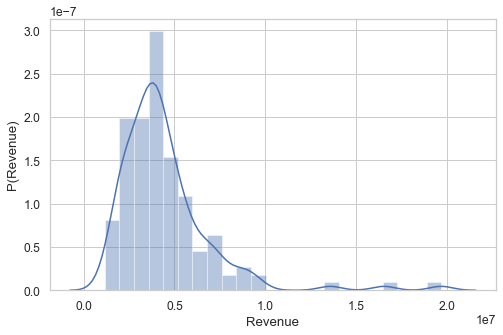

In [12]:
print(data['revenue'].describe())
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sb.distplot(
    data['revenue'], norm_hist=False, kde=True
).set(xlabel='Revenue', ylabel='P(Revenue)');

In [13]:
data["revenue"].skew()

2.793478695162504

#### From the above distribution we can see that the data is mostly right scewed (because of outliers?). There are two way we make the target variable having normal distribution, either removing the outliers or log transforming revenue data values. I would go for the latter as its seems to be more efficient approach.

# Feature Engineering- Log Transformation Method 

In [14]:
rev_log = np.log(data["revenue"])
rev_log.skew()

0.30740162838726504

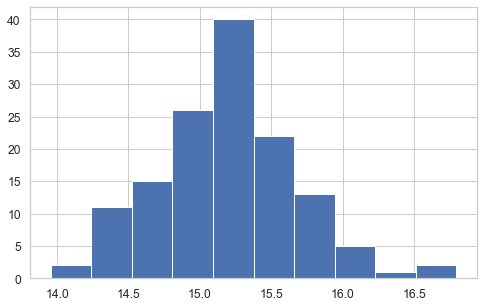

In [15]:
rev_log.hist()

##### Distribution of P1 to P37 

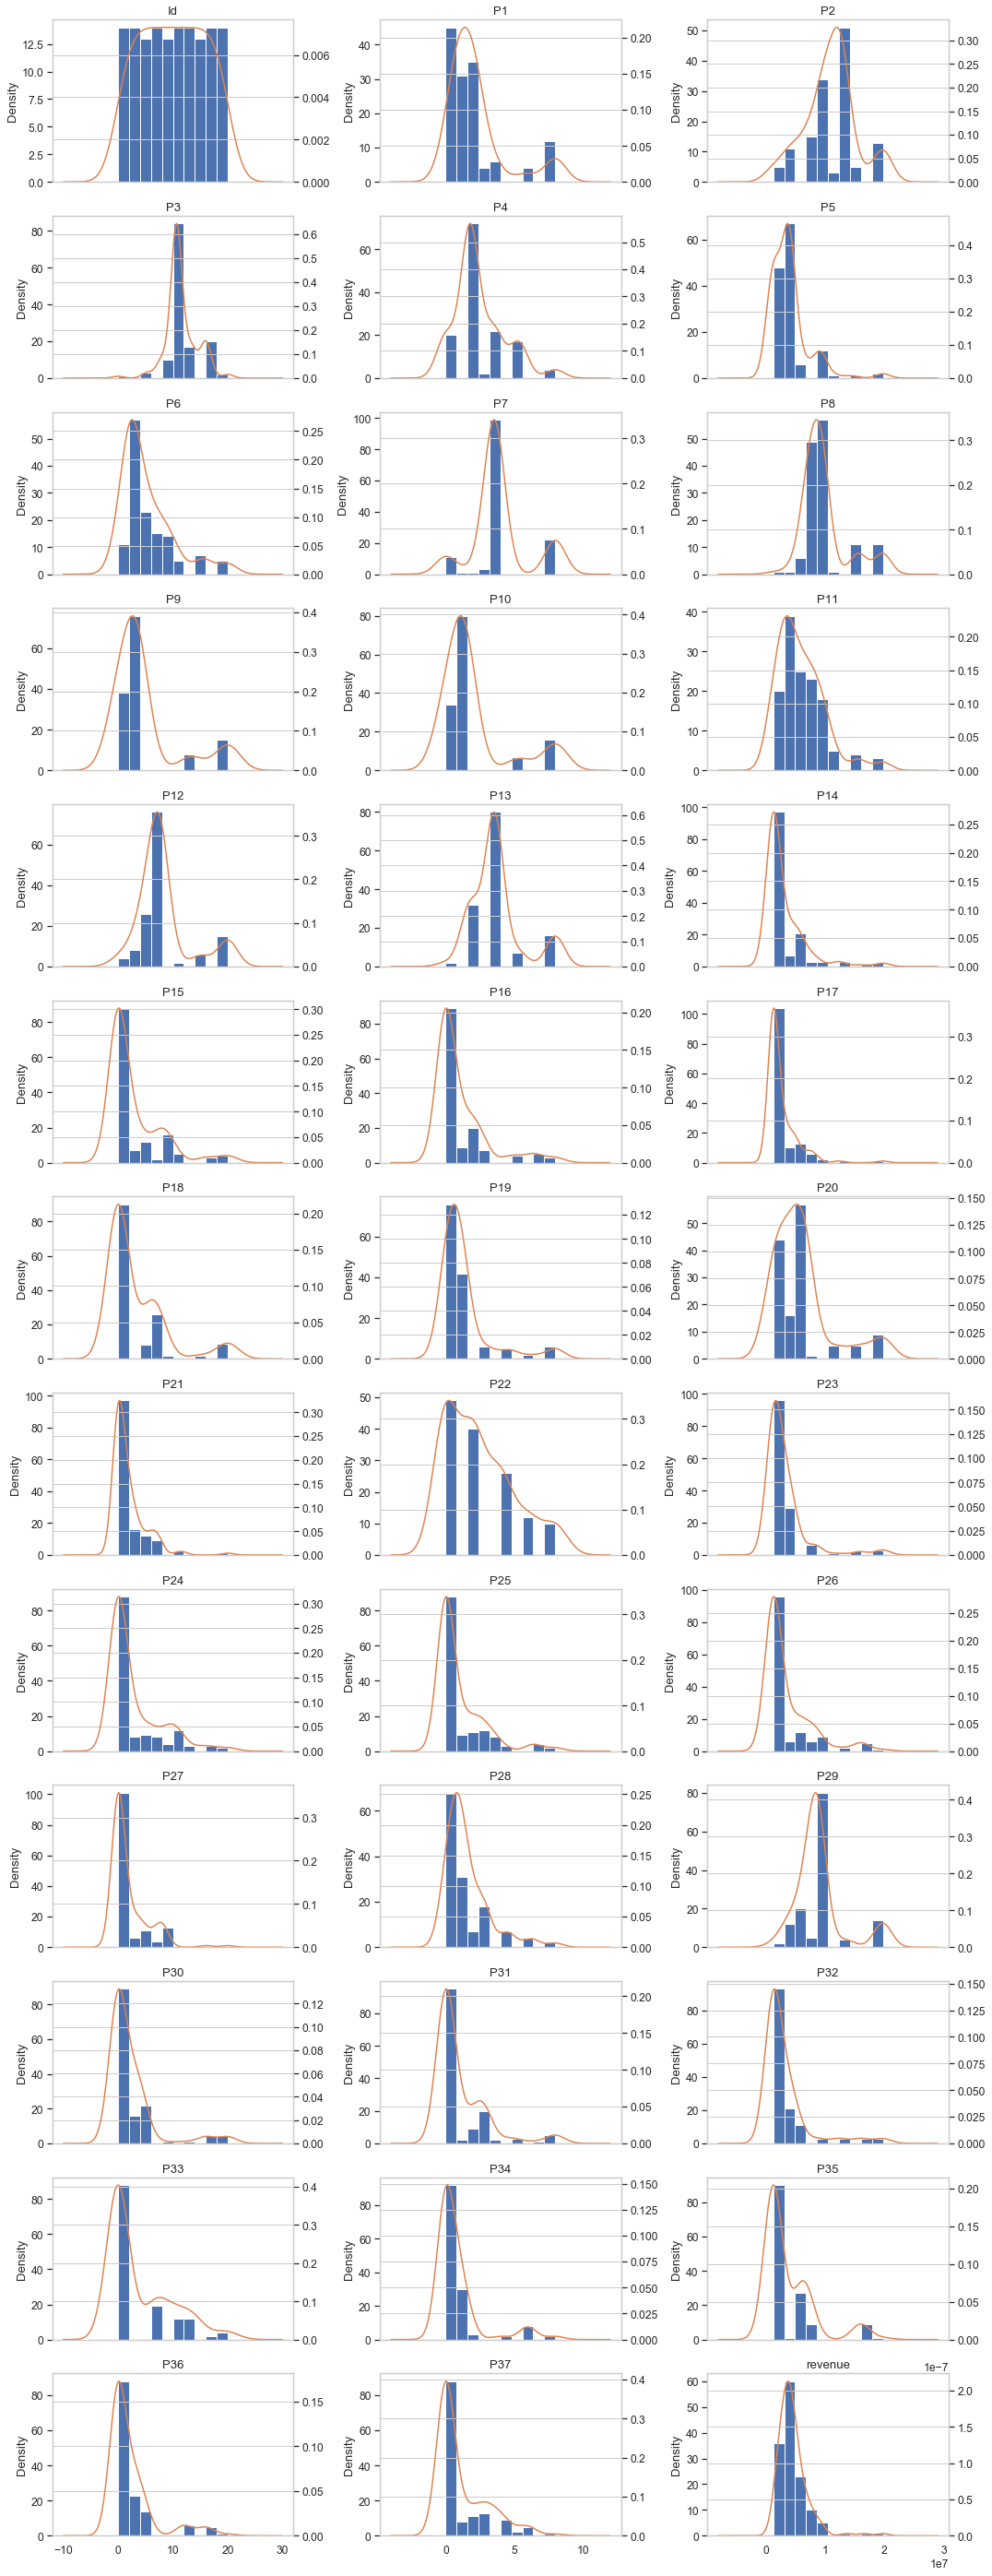

In [16]:
k = len(data[numerical_features].columns)
n = 3
m = (k - 1) // n + 1 ## Floor Division (also called Integer Division)
fig1, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig1.tight_layout()

+ From the above distributions it can be observed that there are clear anamolies in some of the features in the numerical aspect of the data, the suitable method is to study these anamonlies with an expert in the field, also the distributions above describes certain biases that made that data distribution either not fair or skewed for some reason. 
+ For instance if we look at P37 : value zero is more likely to show among the feature values, possibly this is a data entry error or is there something important that number zero represents?

### Analyzing P1 to P37 vs Revenue

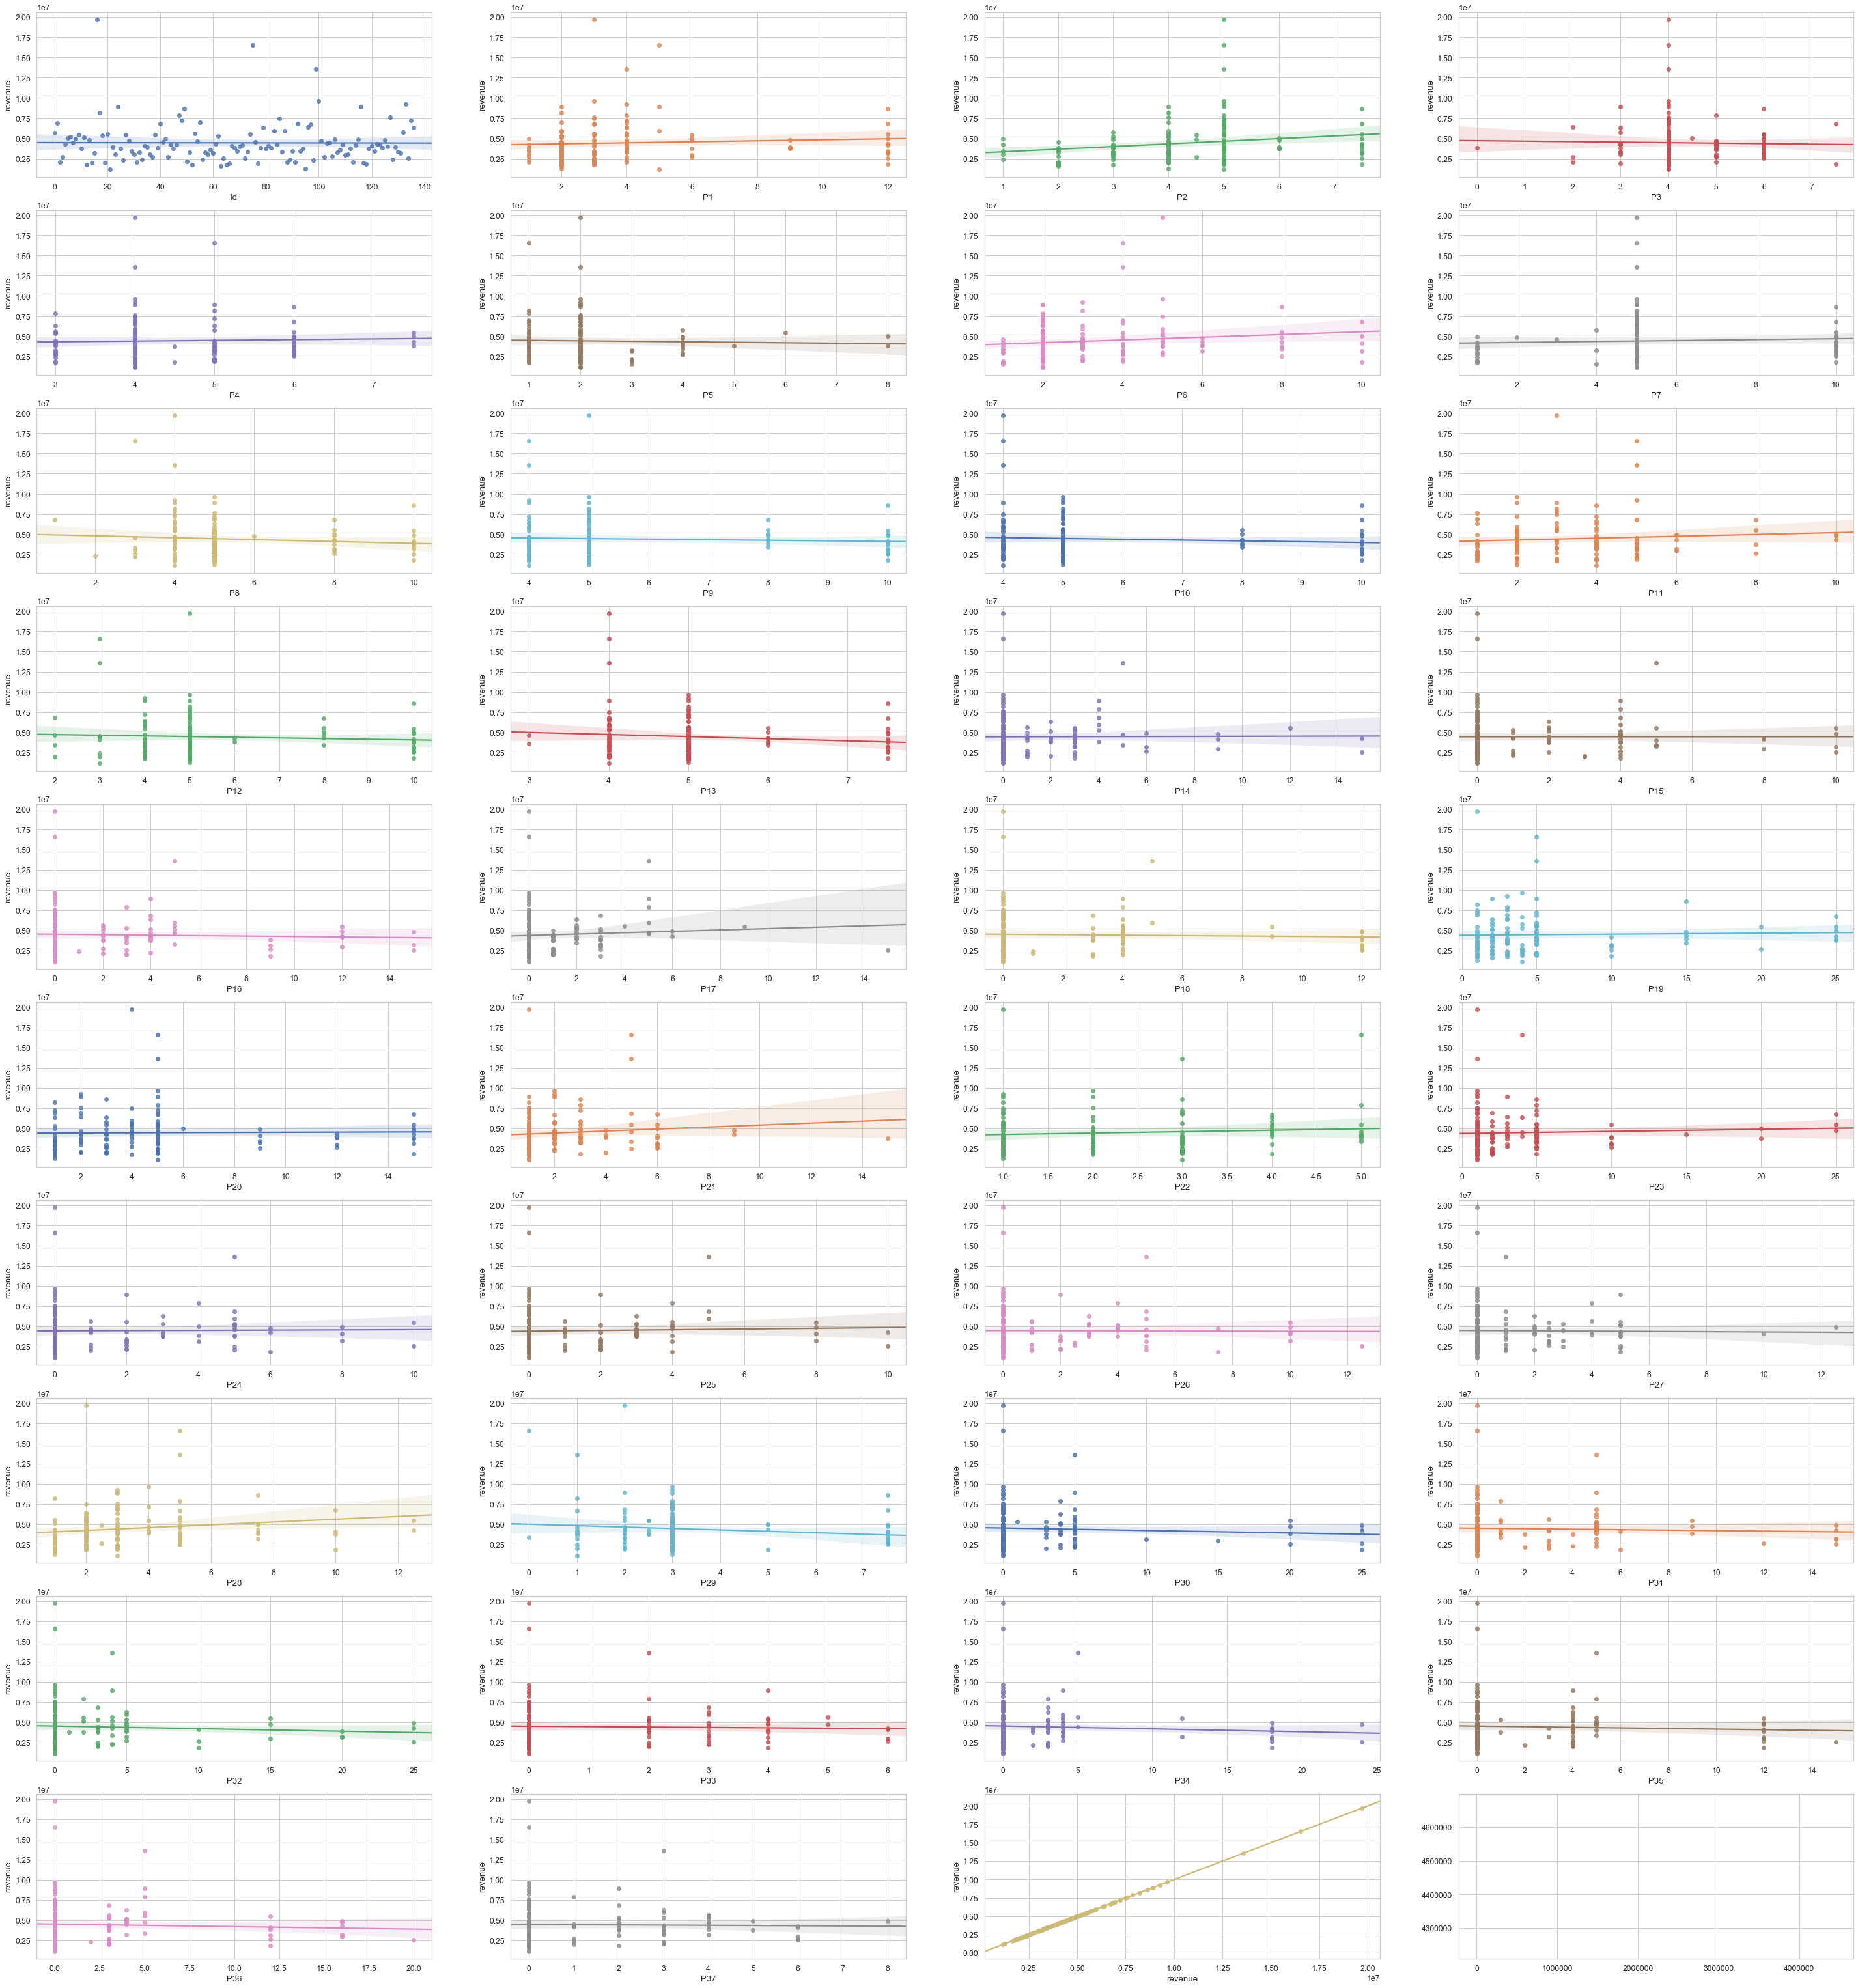

In [17]:
fig, ax = plt.subplots(10, 4, figsize=(50, 55))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sb.regplot(x=data[variable], y=data['revenue'], ax=subplot)

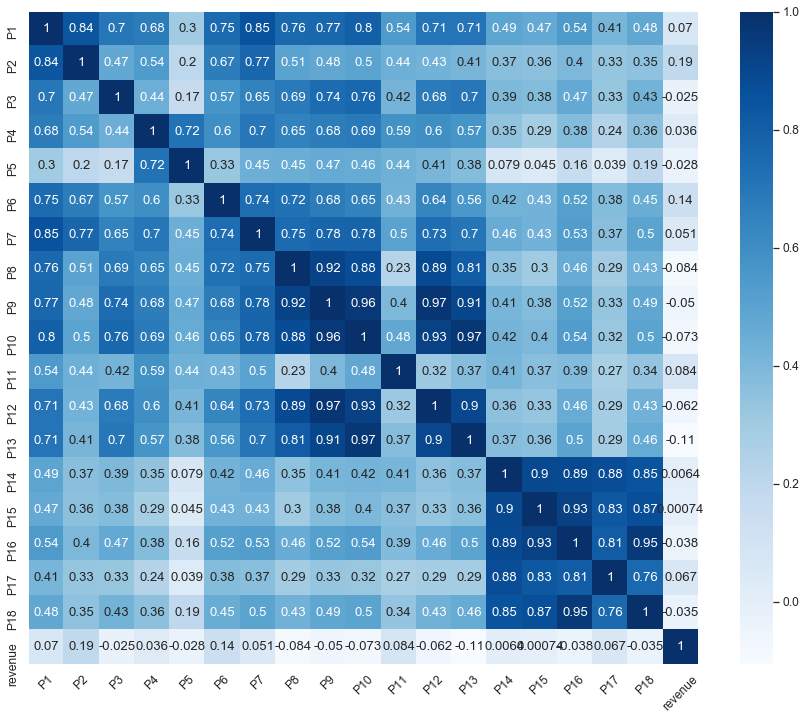

In [18]:
fig=plt.figure(figsize=(15,12))
features=(data.loc[:,'P1':'P18']).columns.tolist()
sb.heatmap(data[features+['revenue']].corr(),cmap='Blues',annot=True)
plt.xticks(rotation=45)
plt.show()

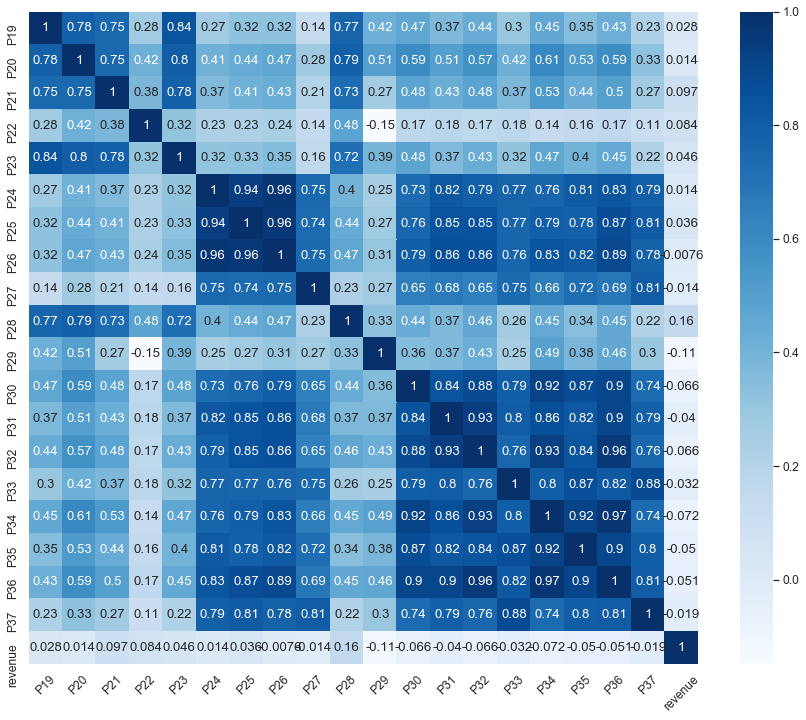

In [19]:
fig=plt.figure(figsize=(15,12))
features=(data.loc[:,'P19':'P37']).columns.tolist()
sb.heatmap(data[features+['revenue']].corr(),cmap='Blues',annot=True)
plt.xticks(rotation=45)
plt.show()

##### As the heatmap and the scatter distribution clearly shows that there is no obvious releation between numerical variables independtly with the target.

### Analyzing Categorical Data

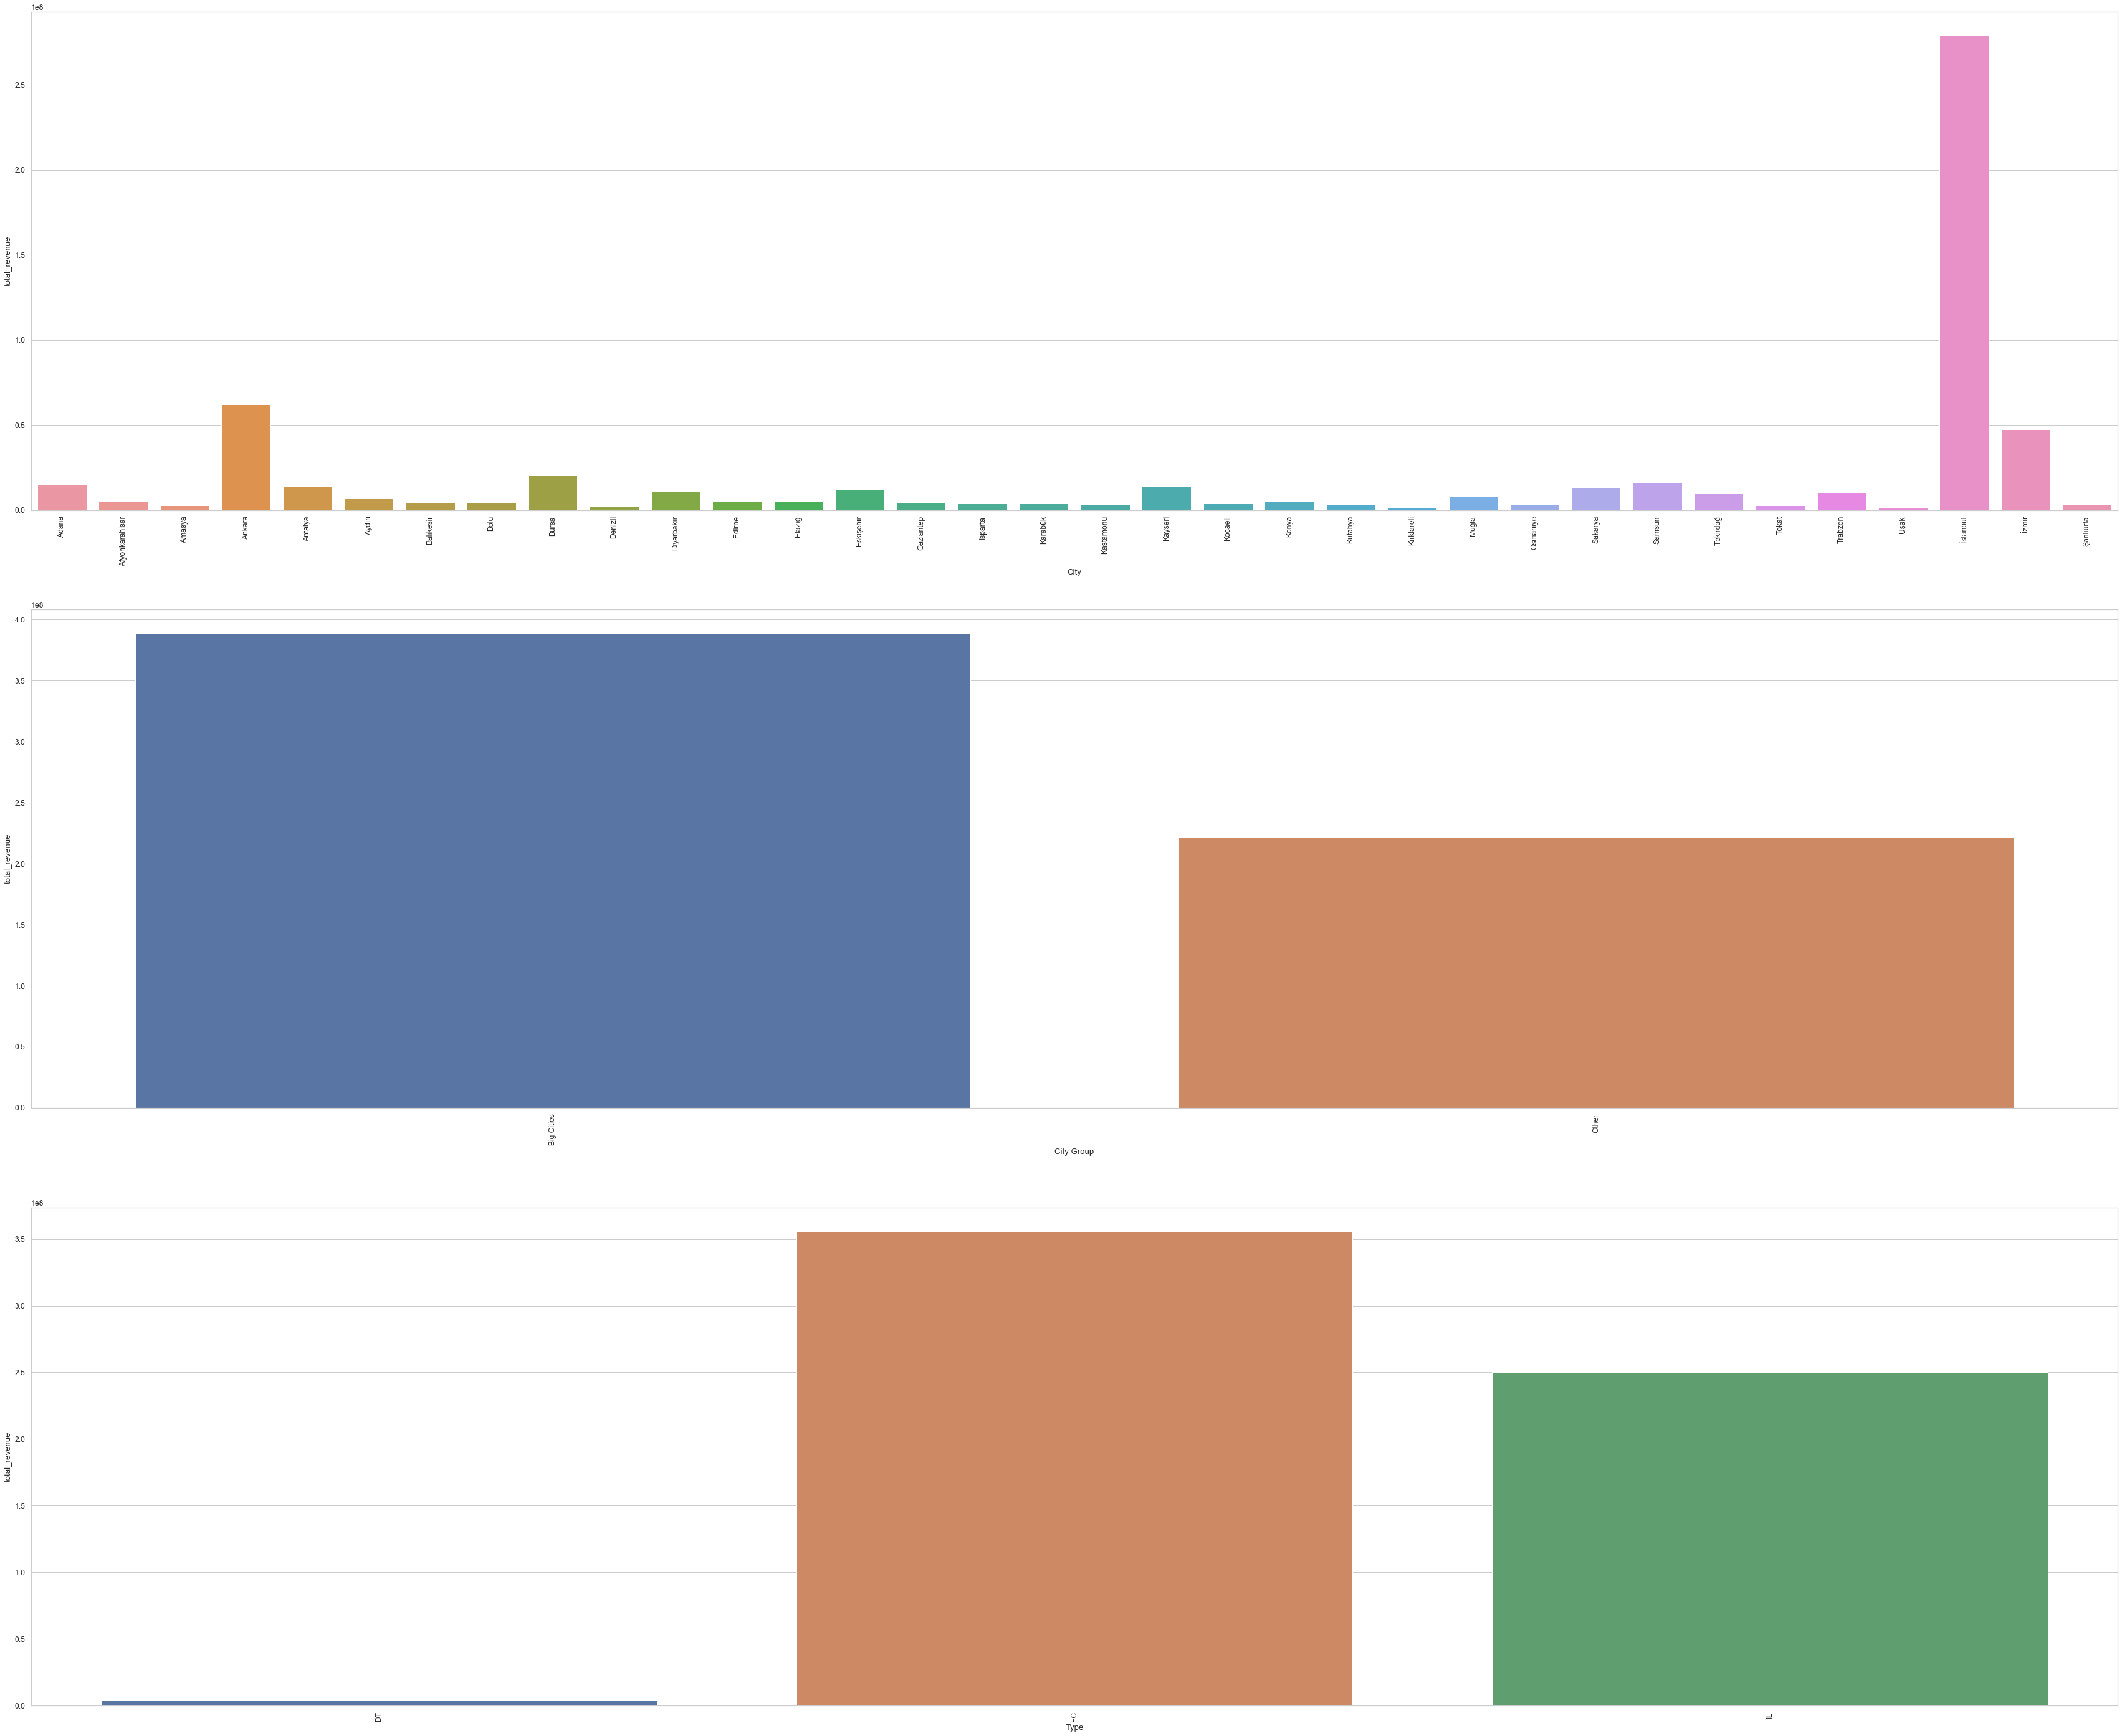

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(60, 50))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df = data[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df.columns = [variable,'total_revenue']
    sb.barplot(x=variable, y='total_revenue', data=df , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

+ Insights obtained from categorical variables charts shows that Istanbul is making the most revenues compared to other cities, hence opening a resturant in Istanbul could be a nice idea. 
+ It is also visible that big cities are making more revnues than smaller cities. It can also be noted that the gap between them is not an obvious one that is much bigger, may be because even small cities have good tourist attraction. 
+ Moreover, if you are about to open a resutrant it better be either FC Food court or IL (inline).

### Analyzing Categorical Data vs Revenue via Boxplots

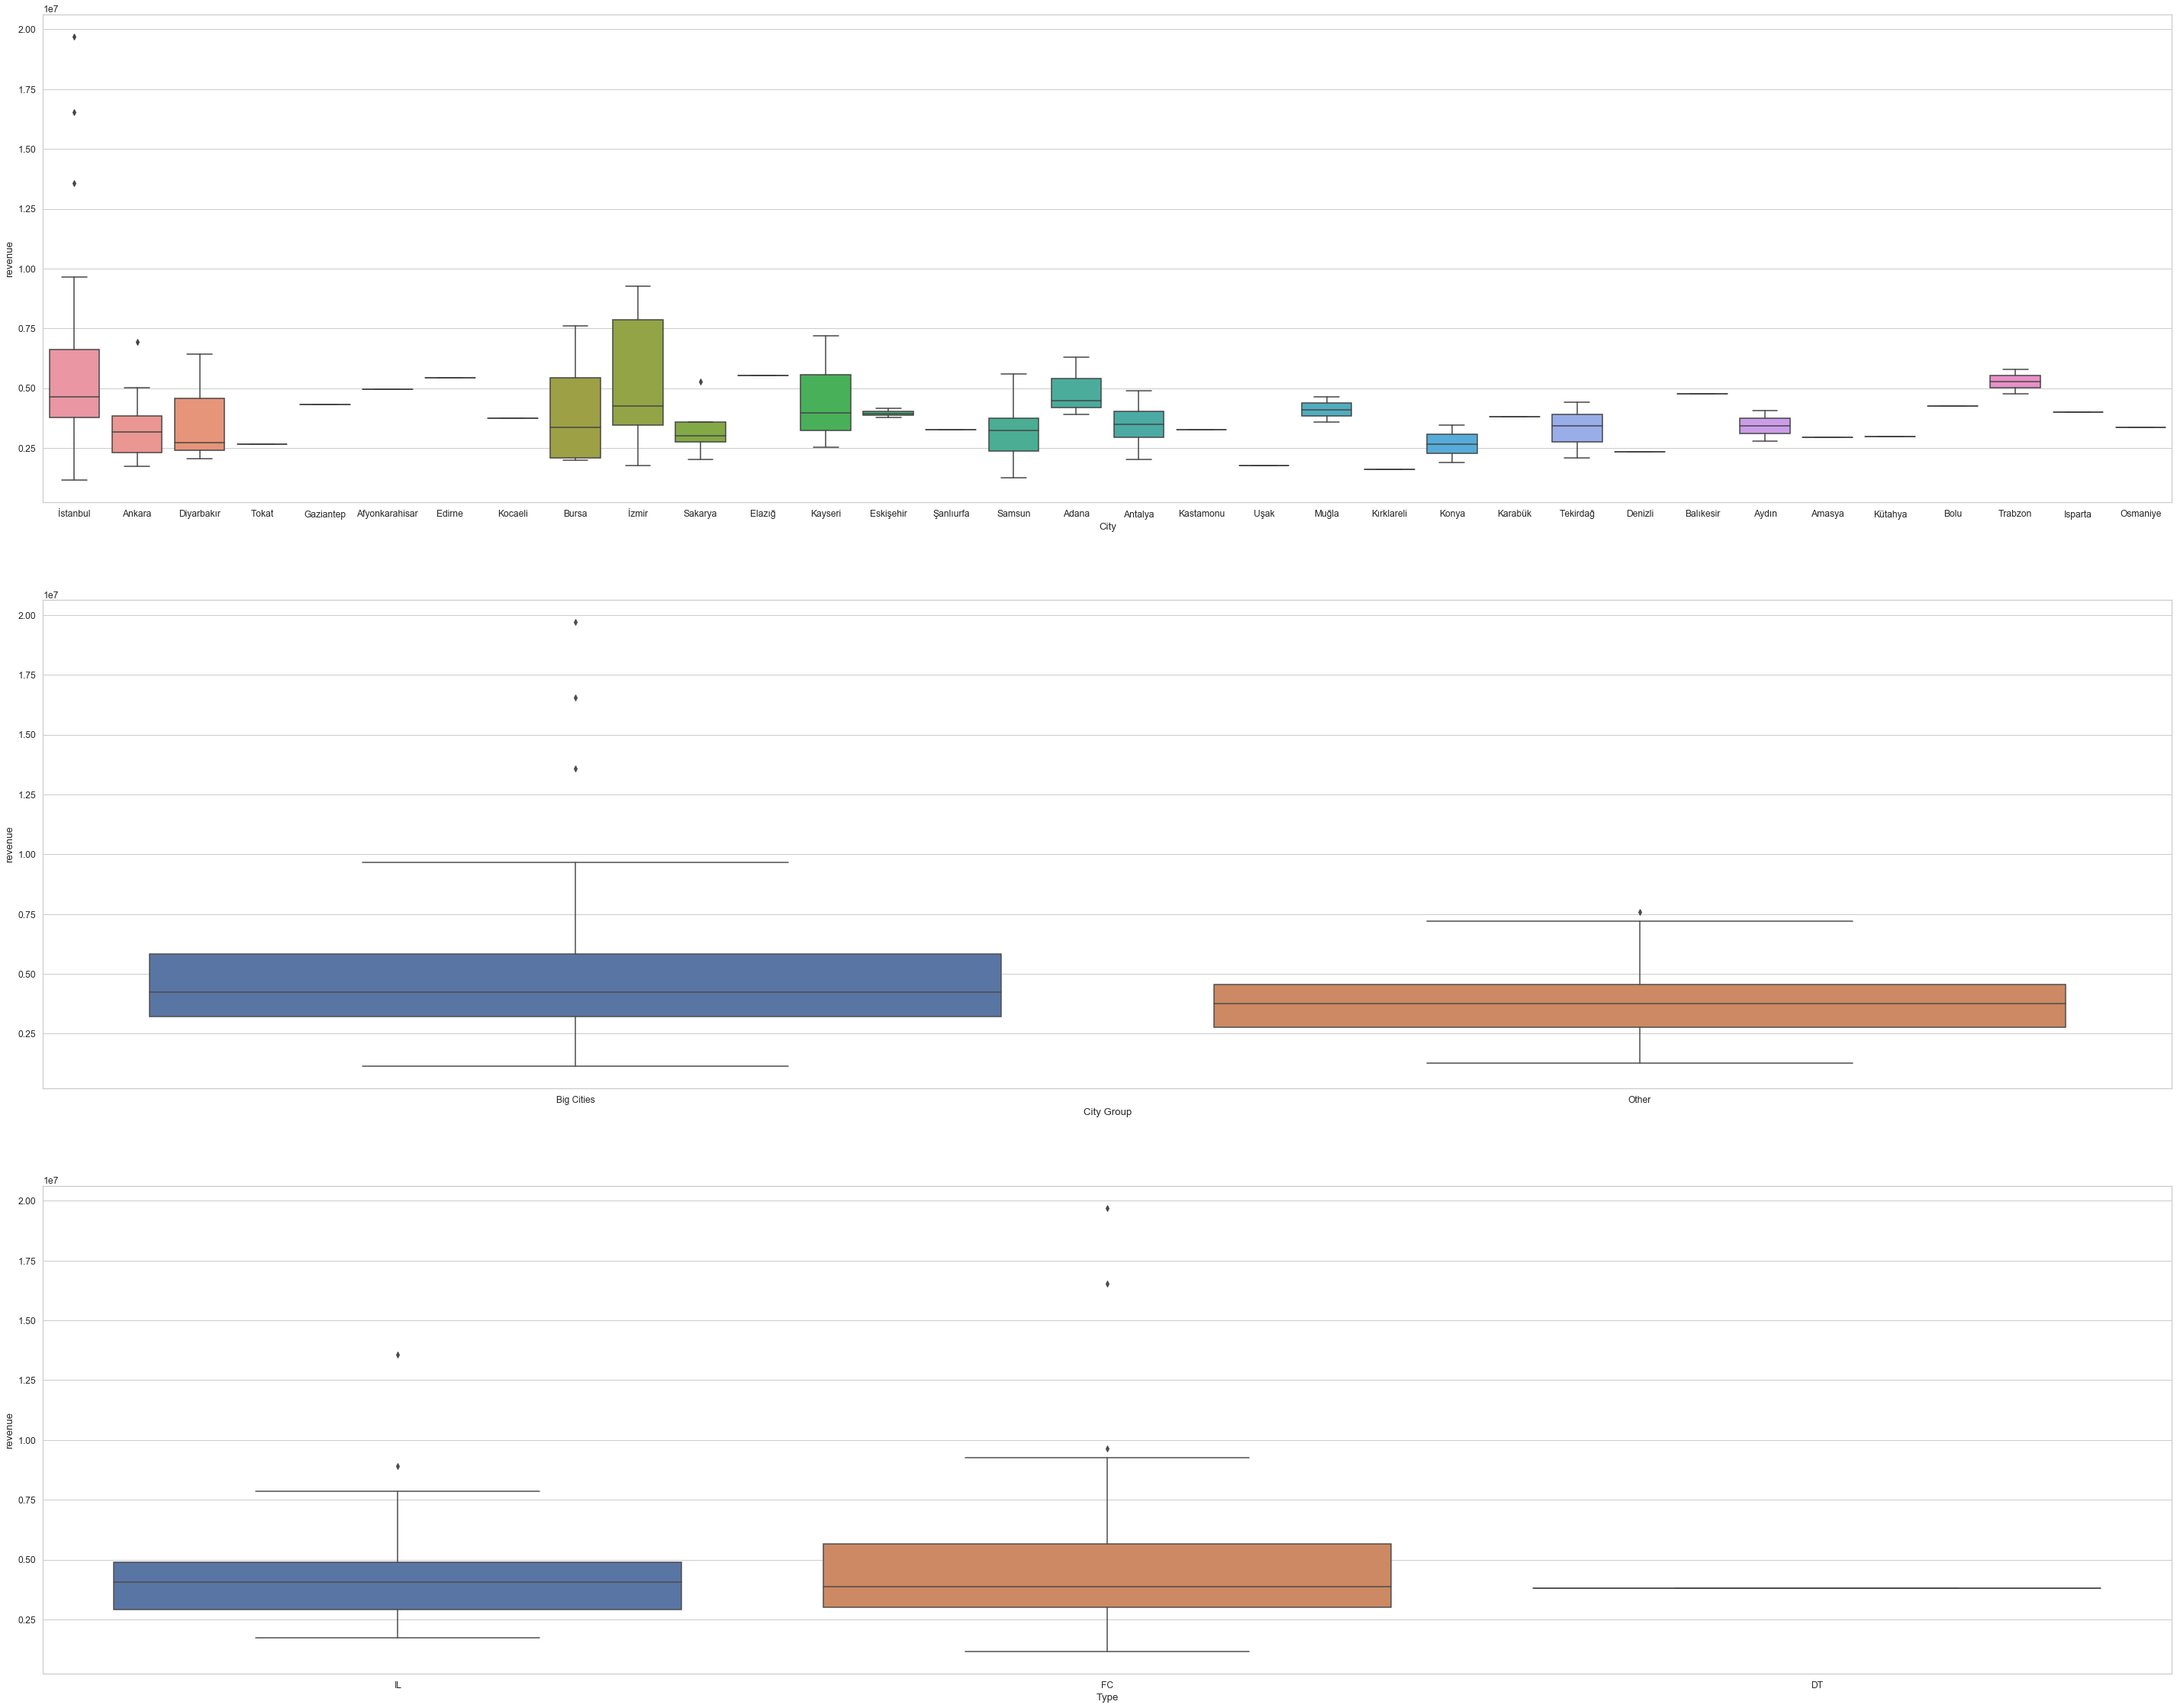

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(50, 40))
for var, subplot in zip(categorical_features, ax.flatten()):
    sb.boxplot(x=var, y='revenue', data=data, ax=subplot)

### Analyzing Open Date column

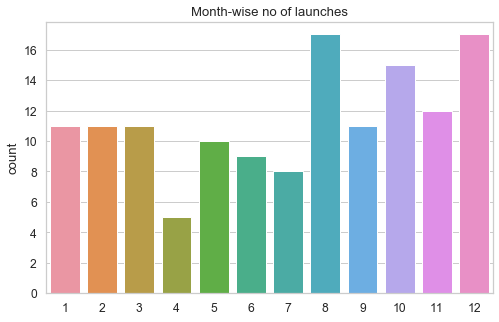

In [22]:
launch_Month = [x.month for x in data['Open Date']]
sb.countplot(launch_Month)
plt.title('Month-wise no of launches');

##### Seems like the first three months ( January to March) and ending months (August to December) have more launches.

In [23]:
#data['launch_Month'] = [x.month for x in data['Open Date']]
#sb.barplot(data = data,x = 'launch_Month',y = 'revenue')

##### The months that are having more revenue are : January, September, October, November and December. Hence, its safe to say that one can launch their restuarants in these months to have a better chance of generating profits!

In [24]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


# Feature Engineering- One Hot Encoding for Categorical Features

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[['City', 'City Group', 'Type']] = data[['City', 'City Group', 'Type']].apply(le.fit_transform)

In [26]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2008-02-14,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,2013-03-09,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2012-02-02,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,2009-05-09,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1[['City', 'City Group', 'Type']] = data1[['City', 'City Group', 'Type']].apply(le.fit_transform)

In [28]:
data1.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,2011-01-22,38,1,1,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,2011-03-18,27,1,2,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,2013-10-30,3,0,1,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,2013-05-06,26,1,2,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,2013-07-31,1,1,1,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


# Building the Model and calculating RMSE for Model Evaluation

# Applying LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
logisticRegr = LogisticRegression()

y_train = data.loc[:,'revenue']  #train target variable
x_train = data[data.columns[~data.columns.isin(['Open Date','revenue'])]]  #train features to be fit in model
x_test = data1[data1.columns[~data1.columns.isin(['Open Date'])]]  #test features

# Applying LOGISTIC REGRESSION
logisticRegr.fit(x_train,y_train)
predictions = logisticRegr.predict(x_test)

C:\Users\Hriday Mistry\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
x_train.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,0,2,4,5.0,4.0,4.0,2,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,1,3,0,1,4,5.0,4.0,4.0,1,2,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,10,1,2,2,4.0,2.0,5.0,2,3,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3,28,1,2,6,4.5,6.0,6.0,4,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4,14,1,2,3,4.0,3.0,4.0,2,2,...,1.0,3.0,5,1,3,2,3,4,3,3


In [31]:
proba_val = logisticRegr.predict_proba(x_test)
proba_val

array([[6.60498901e-05, 7.02186434e-18, 6.77981262e-15, ...,
        3.89504592e-18, 7.04800340e-14, 4.58911582e-04],
       [1.77102107e-03, 2.17641183e-13, 9.55523640e-11, ...,
        9.60125452e-14, 8.08830722e-11, 2.60774275e-03],
       [7.97427331e-05, 3.07486922e-09, 3.02667561e-07, ...,
        1.24129402e-08, 2.70496950e-06, 2.18435713e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [32]:
predictions

array([4491607, 4491607, 5435276, ..., 4263629, 4263629, 4263629],
      dtype=int64)

In [33]:
df6 = pd.DataFrame(predictions, columns = ['Revenue'])

In [34]:
df6.head()

,Revenue
0,4491607
1,4491607
2,5435276
3,4491607
4,1734634


In [35]:
df6.shape

(100000, 1)

In [36]:
ypred_label=pd.read_csv('sampleSubmission.csv')  # test target
ypred_label=ypred_label.drop(['Id'], axis=1)
ypred_label['Prediction'] = ypred_label['Prediction'].astype(int)

In [37]:
ypred_label.head()

,Prediction
0,4532991
1,4089542
2,5556723
3,7834567
4,4352617


In [38]:
ypred_label.shape

(100000, 1)

In [39]:
logisticRegr.score(x_train,y_train)

1.0

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
label_list=ypred_label['Prediction'].tolist()
#print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
rmse1=round(sqrt(mean_squared_error(label_list, predictions)),2)
print(rmse1)

2366286.68


## Applying GRADIENT BOOSTING REGRESSION

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
gbRegr = GradientBoostingRegressor(max_depth=3, random_state=42)
gbRegr.fit(x_train, y_train)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
prediction_rr = gbRegr.predict(x_test)

In [42]:
prediction_rr

array([6850289.86457941, 4029658.06580146, 4393065.62574806, ...,
       5296778.76752021, 5882034.09017972, 6899532.1957426 ])

In [43]:
df7 = pd.DataFrame(prediction_rr, columns = ['Revenue'])
df7.head()

,Revenue
0,6.850290e+06
1,4.029658e+06
2,4.393066e+06
3,3.774129e+06
4,5.870239e+06


In [44]:
gbRegr.score(x_train, y_train)

0.9403860943246145

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
label_list=ypred_label['Prediction'].tolist()
#print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
rmse2=round(sqrt(mean_squared_error(label_list, prediction_rr)),2)
print(rmse2)

655991.78


# Applying LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
prediction_lr = reg.predict(x_test)
reg.score(x_train, y_train)

0.3260403831258316

In [47]:
prediction_lr

array([6.63942310e+06, 3.31241084e+06, 1.59100172e+06, ...,
       3.86364663e+08, 3.86068773e+08, 3.86035543e+08])

In [48]:
df8 = pd.DataFrame(prediction_lr, columns = ['Revenue'])
df8.head()

,Revenue
0,6.639423e+06
1,3.312411e+06
2,1.591002e+06
3,6.715127e+06
4,4.927716e+06


In [76]:
reg.score(x_train, y_train)

0.3260403831258316

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
label_list=ypred_label['Prediction'].tolist()
#print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
rmse3=round(sqrt(mean_squared_error(label_list, prediction_lr)),2)
print(rmse3)

218217353.19


# Applying RANDOM FOREST REGRESSOR

In [50]:
#Applying RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regrr = RandomForestRegressor(max_depth=2, random_state=0)
regrr.fit(x_train, y_train)
prediction_rf = regrr.predict(x_test)
prediction_rf

array([5590885.95374869, 3811650.50381661, 3836895.80094911, ...,
       5311947.471964  , 5132827.70333849, 5035570.07904869])

In [51]:
regrr.score(x_train, y_train)

0.30770677147819403

In [52]:
prediction_rf

array([5590885.95374869, 3811650.50381661, 3836895.80094911, ...,
       5311947.471964  , 5132827.70333849, 5035570.07904869])

In [53]:
df9 = pd.DataFrame(prediction_rf, columns = ['Revenue'])
df9.head()

,Revenue
0,5.590886e+06
1,3.811651e+06
2,3.836896e+06
3,3.750439e+06
4,4.007214e+06


In [77]:
regrr.score(x_train, y_train)

0.30770677147819403

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
label_list=ypred_label['Prediction'].tolist()
#print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
rmse4=round(sqrt(mean_squared_error(label_list, prediction_rf)),2)
print(rmse4)

1538357.74


# Applying KNeighborsRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)
prediction_knn = neigh.predict(x_test)
prediction_knn

array([5072680. , 4649676.5, 4489255. , ..., 6790437.5, 6790437.5,
       6790437.5])

In [56]:
neigh.score(x_train, y_train)

0.49045279578697765

In [57]:
prediction_knn

array([5072680. , 4649676.5, 4489255. , ..., 6790437.5, 6790437.5,
       6790437.5])

In [58]:
df10 = pd.DataFrame(prediction_rf, columns = ['Revenue'])
df10.head()

,Revenue
0,5.590886e+06
1,3.811651e+06
2,3.836896e+06
3,3.750439e+06
4,4.007214e+06


In [78]:
neigh.score(x_train, y_train)

0.49045279578697765

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
label_list=ypred_label['Prediction'].tolist()
#print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
rmse5=round(sqrt(mean_squared_error(label_list, prediction_knn)),2)
print(rmse5)

2346324.81


# STACKING FOR REGRESSION

In [60]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

In [62]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models

In [63]:
def evaluate_model(model, x_train, y_train):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>knn -1981639.171 (466618.059)
>cart -2237898.603 (669501.931)
>svm -1611450.553 (481780.547)


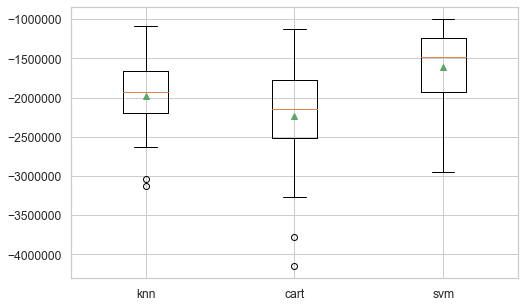

In [65]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [67]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

In [68]:
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

>knn -1981639.171 (466618.059)
>cart -2300354.596 (752088.098)
>svm -1611450.553 (481780.547)
>stacking -1719066.360 (452842.453)


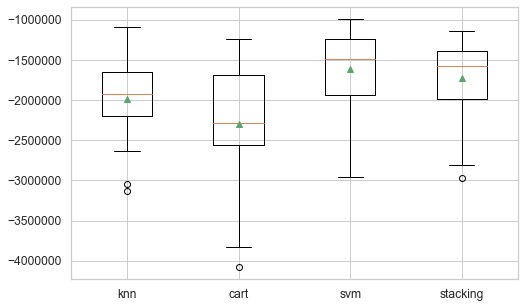

In [70]:
# evaluate a given model using cross-validation
def evaluate_model(model, x_train, y_train):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [72]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(x_train, y_train)
# make a prediction for one example
stackpred = model.predict(x_test)

In [73]:
stackpred

array([5874451.03729732, 5191094.82325416, 4236262.70727683, ...,
       4663224.00567096, 5055861.1488974 , 4921728.51411087])

In [79]:
model.score(x_train, y_train)

0.15484120307388194

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
label_list=ypred_label['Prediction'].tolist()
#print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
rmse6=round(sqrt(mean_squared_error(label_list, stackpred)),2)
print(rmse6)

2063005.86
